In [79]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df = fdr.DataReader(symbol='439090', start='2020')
df = df[['Close']]
df

,Close
Date,
2023-06-08,41600
2023-06-09,46900
2023-06-12,47700
2023-06-13,44900
2023-06-14,41550
...,...
2024-05-30,25600
2024-05-31,26000
2024-06-03,25000


In [81]:
df[['daily_change']] = df[['Close']].pct_change().fillna(0) # 일별 수익률 계산
df[['daily_change']] # 일별 수익률

,daily_change
Date,
2023-06-08,0.000000
2023-06-09,0.127404
2023-06-12,0.017058
2023-06-13,-0.058700
2023-06-14,-0.074610
...,...
2024-05-30,0.003922
2024-05-31,0.015625
2024-06-03,-0.038462


In [82]:
def return_fn(df): # 일별 수익률 계산 함수
    return df['Close'].pct_change().fillna(0)

In [83]:
def cum_return_fn(df_return): # 누적 수익률 계산
    return (1 + df_return).cumprod()

In [84]:
df_cum_return = cum_return_fn(return_fn(df))
df_cum_return

Date
2023-06-08    1.000000
2023-06-09    1.127404
2023-06-12    1.146635
2023-06-13    1.079327
2023-06-14    0.998798
                ...   
2024-05-30    0.615385
2024-05-31    0.625000
2024-06-03    0.600962
2024-06-04    0.551683
2024-06-05    0.560096
Name: Close, Length: 244, dtype: float64

In [85]:
df['return'] = return_fn(df)
df['cum_return'] = cum_return_fn(df['return'])
df['max_cum_return'] = df['cum_return'].cummax()
df['drawdown'] = df['cum_return'] / df['max_cum_return'] - 1
df

,Close,daily_change,return,cum_return,max_cum_return,drawdown
Date,,,,,,
2023-06-08,41600,0.000000,0.000000,1.000000,1.000000,0.000000
2023-06-09,46900,0.127404,0.127404,1.127404,1.127404,0.000000
2023-06-12,47700,0.017058,0.017058,1.146635,1.146635,0.000000
2023-06-13,44900,-0.058700,-0.058700,1.079327,1.146635,-0.058700
2023-06-14,41550,-0.074610,-0.074610,0.998798,1.146635,-0.128931
...,...,...,...,...,...,...
2024-05-30,25600,0.003922,0.003922,0.615385,1.146635,-0.463312
2024-05-31,26000,0.015625,0.015625,0.625000,1.146635,-0.454927
2024-06-03,25000,-0.038462,-0.038462,0.600962,1.146635,-0.475891


<Axes: xlabel='Date'>

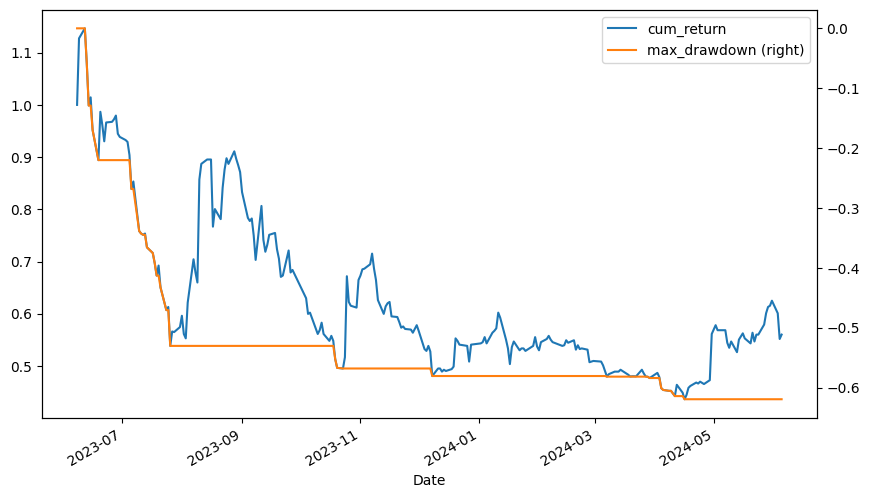

In [86]:
df['max_drawdown'] = df['drawdown'].cummin()
df[['cum_return', 'max_drawdown']].plot(secondary_y='max_drawdown', figsize=(10, 6))

MDD: -61.95 %


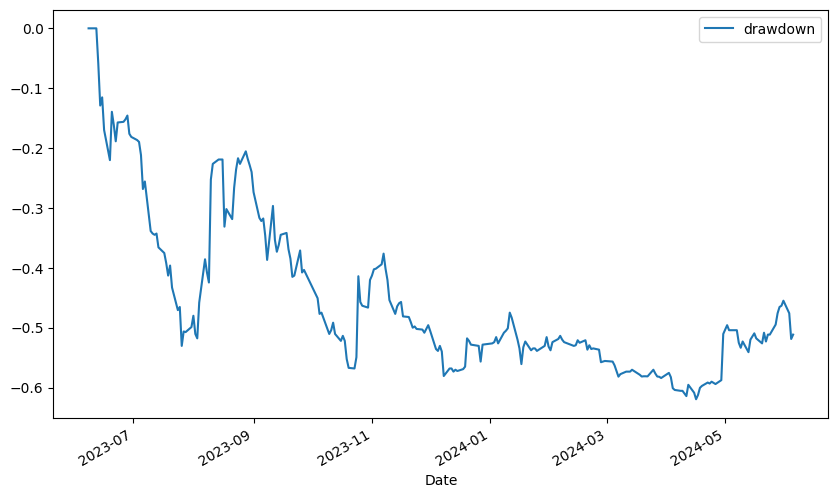

In [87]:
df[['drawdown']].plot(figsize=(10, 6))
print('MDD:', df['max_drawdown'].min().round(4) * 100, '%') # MDD 

In [88]:
df_max_close = df[df['drawdown'] == 0].copy()
df_max_close.loc[df.index[len(df)-1]] = 0

period = df_max_close.index[1:] - df_max_close.index[:-1]
mdd_days = period.days

mdd_period = mdd_days.max()
mdd_period_max = mdd_days.argmax()

mdd_start = df_max_close.index[:-1][mdd_period_max].date()
mdd_end = df_max_close.index[1:][mdd_period_max].date()

print('Max Drawdown Period: ', mdd_period)
print('Date: ', mdd_start, end=' ~ ')
print(mdd_end)


Max Drawdown Period:  359
Date:  2023-06-12 ~ 2024-06-05


In [92]:
def mdd_fn(df):
    df = df[['Close']].copy()

    def return_fn(df): 
        return df['Close'].pct_change().fillna(0)

    def cum_return_fn(df_return):
        return (1 + df_return).cumprod()

    df['return'] = return_fn(df)
    df['cum_return'] = cum_return_fn(df['return'])
    df['max_cum_return'] = df['cum_return'].cummax()
    df['drawdown'] = df['cum_return'] / df['max_cum_return'] - 1
    
    mdd = df['drawdown'].min()

    list_info = []

    max_close_value = df['Close'].max()
    min_close_value = df['Close'].min()

    print('Max Close Value: ', max_close_value)
    print('Min Close Value: ', min_close_value)
    
    df_max_close = df[df['drawdown'] == 0].copy()
    df_max_close.loc[df.index[len(df)-1]] = 0

    period = df_max_close.index[1:] - df_max_close.index[:-1]
    mdd_days = period.days
    max_period = mdd_days.max()
    max_period_idx = mdd_days.argmax()

    print('Max Drawdown Period: ', max_period)
    print('Date: ', df_max_close.index[:-1][max_period_idx].date(), end=' ~ ')
    print(df_max_close.index[1:][max_period_idx].date())

    list_info.append(max_close_value)
    list_info.append(min_close_value)
    list_info.append(round(mdd, 4))
    list_info.append(df_max_close.index[:-1][max_period_idx].date())
    list_info.append(df_max_close.index[1:][max_period_idx].date())
    list_info.append(max_period)
    
    return df, list_info

In [93]:
df = fdr.DataReader('005930', '2020-01-01')
df, list_info = mdd_fn(df)
print(list_info)

Max Close Value:  91000
Min Close Value:  42500
Max Drawdown Period:  1241
Date:  2021-01-11 ~ 2024-06-05
[91000, 42500, -0.422, datetime.date(2021, 1, 11), datetime.date(2024, 6, 5), 1241]
